# Readme

This notebook explores the titanic dataset from Kaggle. I used feature engineering, and then tried classical machine learning models and a deep learning model.
Author: Sultan Aitekenov sultanaitekenov@gmail.com
Here is the implementation for the titanic challenge from Kaggle. https://www.kaggle.com/competitions/titanic/data

# Import data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
test_df = pd.read_csv('data/test.csv')
test_df.head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [3]:
train_df = pd.read_csv('data/train.csv')
train_df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Data processing

## Deciding on relevant information

Information such as passengerid, ticket, fare, cabin and embarked logically should not predict whether a person survived. Regarding names, there might exist racial discrimantions. All these columns would be ignored.

In [4]:
columns_to_drop = ['PassengerId', 'Ticket', 'Fare', 'Embarked', 'Name', 'Cabin']

test_df.drop(columns_to_drop, inplace=True, axis=1)
train_df.drop(columns_to_drop, inplace=True, axis=1)

In [5]:
# replace sexes with 0 and 1 for female and male respectively
test_df.replace(to_replace='female', value=0, inplace=True)
test_df.replace(to_replace='male', value=1, inplace=True)

train_df.replace(to_replace='female', value=0, inplace=True)
train_df.replace(to_replace='male', value=1, inplace=True)

In [6]:
train_df

,Survived,Pclass,Sex,Age,SibSp,Parch
0,0,3,1,22.0,1,0
1,1,1,0,38.0,1,0
2,1,3,0,26.0,0,0
3,1,1,0,35.0,1,0
4,0,3,1,35.0,0,0
...,...,...,...,...,...,...
886,0,2,1,27.0,0,0
887,1,1,0,19.0,0,0
888,0,3,0,NaN,1,2
889,1,1,1,26.0,0,0


## One hot encoding.

In [7]:
columns_to_encode = ['Pclass']

In [8]:
train_df = pd.get_dummies(train_df, columns=columns_to_encode)
test_df = pd.get_dummies(test_df, columns=columns_to_encode)

In [9]:
train_df.head(5)

,Survived,Sex,Age,SibSp,Parch,Pclass_1,Pclass_2,Pclass_3
0,0,1,22.0,1,0,0,0,1
1,1,0,38.0,1,0,1,0,0
2,1,0,26.0,0,0,0,0,1
3,1,0,35.0,1,0,1,0,0
4,0,1,35.0,0,0,0,0,1


## Correlation matrix

From the correlation matrix below, it seems like sex and the societal class were deciding factors for survival of the crash.

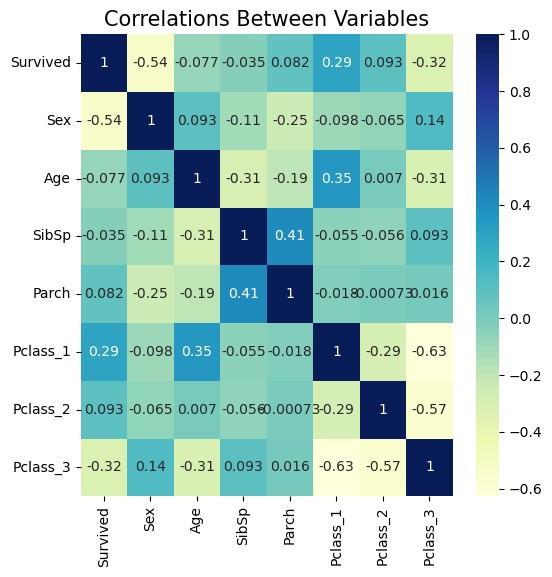

In [10]:
import seaborn as sns
plt.figure(figsize=(6,6))
sns.heatmap(train_df.corr(), cmap="YlGnBu", annot=True)
plt.title("Correlations Between Variables", size=15)
plt.show()

## Missing values

In [11]:
train_df.isnull().sum()

Survived      0
Sex           0
Age         177
SibSp         0
Parch         0
Pclass_1      0
Pclass_2      0
Pclass_3      0
dtype: int64

In [12]:
test_df.isnull().sum()

Sex          0
Age         86
SibSp        0
Parch        0
Pclass_1     0
Pclass_2     0
Pclass_3     0
dtype: int64

# Model training

## Classic ML models

Here, 2 test cases for ML models are run on the processed titanic dataset. The first case, deals with all columns and drops columns with NaNs. NaNs only occurs for the column with age. For the second case, several columns are not taken into consideration, only the columns connected to sex and the societal status are left. The rationale behind case 2 is driven from the correlation matrix above.

### Test case 1 - Classic ML models

In [13]:
train_df_1 = train_df.dropna()
y = train_df_1['Survived']
X = train_df_1.drop('Survived', inplace=False, axis=1)

In [14]:
train_df.dropna()

,Survived,Sex,Age,SibSp,Parch,Pclass_1,Pclass_2,Pclass_3
0,0,1,22.0,1,0,0,0,1
1,1,0,38.0,1,0,1,0,0
2,1,0,26.0,0,0,0,0,1
3,1,0,35.0,1,0,1,0,0
4,0,1,35.0,0,0,0,0,1
...,...,...,...,...,...,...,...,...
885,0,0,39.0,0,5,0,0,1
886,0,1,27.0,0,0,0,1,0
887,1,0,19.0,0,0,1,0,0
889,1,1,26.0,0,0,1,0,0


In [15]:
X.head()

,Sex,Age,SibSp,Parch,Pclass_1,Pclass_2,Pclass_3
0,1,22.0,1,0,0,0,1
1,0,38.0,1,0,1,0,0
2,0,26.0,0,0,0,0,1
3,0,35.0,1,0,1,0,0
4,1,35.0,0,0,0,0,1


In [16]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [17]:
from sklearn.model_selection import cross_val_score
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

models = [KNeighborsClassifier(n_neighbors=10), LinearDiscriminantAnalysis(), GaussianNB(), LogisticRegression(solver='liblinear'), DecisionTreeClassifier(criterion='log_loss'), RandomForestClassifier()]
for model in models:
    scores = cross_val_score(model, X, y, cv=10)
    print(f'{model} mean score {round(scores.mean(),3)}, score std {round(scores.std(),4)}')

KNeighborsClassifier(n_neighbors=10) mean score 0.763, score std 0.0294
LinearDiscriminantAnalysis() mean score 0.783, score std 0.039
GaussianNB() mean score 0.763, score std 0.0364
LogisticRegression(solver='liblinear') mean score 0.797, score std 0.0349
DecisionTreeClassifier(criterion='log_loss') mean score 0.793, score std 0.0544
RandomForestClassifier() mean score 0.804, score std 0.0495


### Test case 2 - Classic ML models

In [18]:
train_df_2 = train_df.drop(['Age', 'SibSp', 'Parch'], axis=1)
X_sex_Pclass = train_df_2.drop('Survived', inplace=False, axis=1)
y = train_df_2['Survived']

In [19]:
X_sex_Pclass.head(5)

,Sex,Pclass_1,Pclass_2,Pclass_3
0,1,0,0,1
1,0,1,0,0
2,0,0,0,1
3,0,1,0,0
4,1,0,0,1


In [20]:
from sklearn.model_selection import cross_val_score
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


models = [KNeighborsClassifier(n_neighbors=10), LinearDiscriminantAnalysis(), GaussianNB(), LogisticRegression(solver='liblinear'), DecisionTreeClassifier(criterion='log_loss'), RandomForestClassifier()]
for model in models:
    scores = cross_val_score(model, X_sex_Pclass, y, cv=10)
    print(f'{model} mean score {round(scores.mean(),3)}, score std {round(scores.std(),4)}')

KNeighborsClassifier(n_neighbors=10) mean score 0.778, score std 0.0284
LinearDiscriminantAnalysis() mean score 0.787, score std 0.0286
GaussianNB() mean score 0.751, score std 0.0214
LogisticRegression(solver='liblinear') mean score 0.787, score std 0.0286
DecisionTreeClassifier(criterion='log_loss') mean score 0.773, score std 0.0285
RandomForestClassifier() mean score 0.774, score std 0.0279


## ANN model

In [21]:
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split

In [22]:
train_df_1 = train_df.drop('Age', axis=1)
y = train_df_1['Survived']
X = train_df_1.drop('Survived', inplace=False, axis=1)

In [23]:
X

,Sex,SibSp,Parch,Pclass_1,Pclass_2,Pclass_3
0,1,1,0,0,0,1
1,0,1,0,1,0,0
2,0,0,0,0,0,1
3,0,1,0,1,0,0
4,1,0,0,0,0,1
...,...,...,...,...,...,...
886,1,0,0,0,1,0
887,0,0,0,1,0,0
888,0,1,2,0,0,1
889,1,0,0,1,0,0


In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [25]:
no_inputs_X = X_train.shape[1]

In [26]:
model_ANN = keras.Sequential([
    keras.layers.Dense(10, activation='tanh', input_shape=(no_inputs_X,)),
    keras.layers.Dense(5, activation='tanh'),
    keras.layers.Dense(5, activation='tanh'),
    keras.layers.Dense(1, activation='sigmoid')
])



model_ANN.compile(optimizer = 'adam',
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

model_ANN.fit(X_train, y_train, epochs=50)

Epoch 1/50
23/23 [==============================] - 1s 1ms/step - loss: 0.6541 - accuracy: 0.6138
Epoch 2/50
23/23 [==============================] - 0s 766us/step - loss: 0.6036 - accuracy: 0.7374
Epoch 3/50
23/23 [==============================] - 0s 729us/step - loss: 0.5757 - accuracy: 0.7416
Epoch 4/50
23/23 [==============================] - 0s 697us/step - loss: 0.5542 - accuracy: 0.7275
Epoch 5/50
23/23 [==============================] - 0s 662us/step - loss: 0.5359 - accuracy: 0.7331
Epoch 6/50
23/23 [==============================] - 0s 676us/step - loss: 0.5196 - accuracy: 0.7640
Epoch 7/50
23/23 [==============================] - 0s 710us/step - loss: 0.5054 - accuracy: 0.7654
Epoch 8/50
23/23 [==============================] - 0s 724us/step - loss: 0.4929 - accuracy: 0.7795
Epoch 9/50
23/23 [==============================] - 0s 795us/step - loss: 0.4837 - accuracy: 0.7851
Epoch 10/50
23/23 [==============================] - 0s 676us/step - loss: 0.4756 - accuracy: 0.7851
E

In [27]:
test_loss, test_accuracy = model_ANN.evaluate(X_test, y_test)

6/6 [==============================] - 0s 801us/step - loss: 0.3938 - accuracy: 0.8156


# Submission

In [28]:
model_ANN = keras.Sequential([
    keras.layers.Dense(2, activation='tanh', input_shape=(no_inputs_X,)),
    keras.layers.Dense(2, activation='tanh'),
    keras.layers.Dense(1, activation='sigmoid')
])



model_ANN.compile(optimizer = 'adam',
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

model_ANN.fit(X, y, epochs=100)

Epoch 1/100
28/28 [==============================] - 0s 697us/step - loss: 0.7416 - accuracy: 0.3973
Epoch 2/100
28/28 [==============================] - 0s 658us/step - loss: 0.7236 - accuracy: 0.4198
Epoch 3/100
28/28 [==============================] - 0s 649us/step - loss: 0.7064 - accuracy: 0.3883
Epoch 4/100
28/28 [==============================] - 0s 684us/step - loss: 0.6902 - accuracy: 0.5443
Epoch 5/100
28/28 [==============================] - 0s 698us/step - loss: 0.6758 - accuracy: 0.6229
Epoch 6/100
28/28 [==============================] - 0s 660us/step - loss: 0.6630 - accuracy: 0.6397
Epoch 7/100
28/28 [==============================] - 0s 656us/step - loss: 0.6512 - accuracy: 0.6779
Epoch 8/100
28/28 [==============================] - 0s 682us/step - loss: 0.6409 - accuracy: 0.6925
Epoch 9/100
28/28 [==============================] - 0s 679us/step - loss: 0.6312 - accuracy: 0.6958
Epoch 10/100
28/28 [==============================] - 0s 538us/step - loss: 0.6224 - accura

In [29]:
test_df.drop('Age', inplace=True, axis=1)
test_df

,Sex,SibSp,Parch,Pclass_1,Pclass_2,Pclass_3
0,1,0,0,0,0,1
1,0,1,0,0,0,1
2,1,0,0,0,1,0
3,1,0,0,0,0,1
4,0,1,1,0,0,1
...,...,...,...,...,...,...
413,1,0,0,0,0,1
414,0,0,0,1,0,0
415,1,0,0,0,0,1
416,1,0,0,0,0,1


In [30]:
test_y = model_ANN.predict(test_df)

14/14 [==============================] - 0s 846us/step


In [31]:
y_submit = []

for i in test_y:
    if i >= 0.5:
        y_submit.append(1)
    else:
        y_submit.append(0)

In [33]:
submit_df = pd.read_csv('data/gender_submission.csv')
submit_df

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [34]:
submit_df['Survived'] = y_submit

In [35]:
submit_df

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [36]:
submit_df.to_csv('my_submission.csv', index=False)